In [8]:
import pandas as pd
import yfinance as yf

In [25]:
prices = pd.read_csv('../data/daily_return.csv')
prices.set_index('Date', inplace=True)

In [26]:
def daily_returns(prices):
    res = (prices/prices.shift(1) - 1.0)[1:]
    return res


def cumulative_returns(returns):
    res = (returns + 1.0).cumprod()
    return res


cum_returns = cumulative_returns(daily_returns(prices))

/opt/homebrew/lib/python3.9/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


In [27]:
cov = cum_returns.cov()

In [28]:
print(cov)

             V       TYL       XYL       EOG       ADM       LUV       DVN  \
V     0.170132  0.182045  0.098322  0.090051  0.399304 -0.026848  0.102094   
TYL   0.182045  1.460605  0.395912  0.361673  0.565204  0.136514  0.329973   
XYL   0.098322  0.395912  0.321439  0.252969  0.550988  0.106451  0.260893   
EOG   0.090051  0.361673  0.252969  0.345015  0.686039  0.096914  0.253663   
ADM   0.399304  0.565204  0.550988  0.686039  1.430650  0.166363  0.543868   
...        ...       ...       ...       ...       ...       ...       ...   
MPC   0.151638  0.283348  0.142282  0.192939  0.568880  0.177981  0.193093   
WAT   0.125482  0.322605  0.209120  0.228381  0.607510  0.190110  0.197533   
HIG   0.440459  1.637614  1.207577  0.962700  3.227008  0.795643  1.110025   
ALL   0.173835  0.481562  0.337492  0.474820  0.923655  0.390622  0.290428   
NVDA  0.169520  0.996487  0.430394  0.474429  0.966255  0.243034  0.545210   

            PH      QCOM       APD  ...       WEC  OGN       CR

In [29]:
import seaborn as sn
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

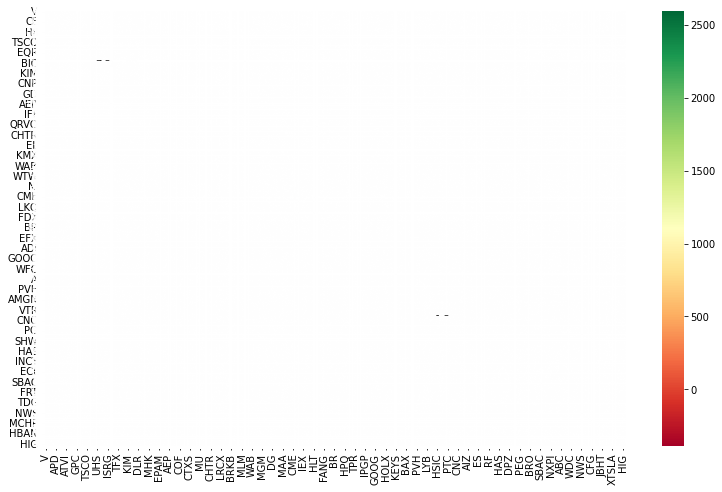

<Figure size 432x288 with 0 Axes>

In [33]:
plt.figure(figsize=(13, 8))
sn.heatmap(cov, annot=True, cmap="RdYlGn")
plt.figure()
